# 📚Imports

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 🧾Data Loading

In [2]:
insurance=pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

# 🔍Exploratory Data Analysis

## 🧽Data Cleaning

In [5]:
#To view the number of rows and columns of the dataset

insurance.shape

(1338, 7)

In [6]:
#Checking for missing values

insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Check if there is duplicates

insurance.duplicated().sum()

1

In [8]:
#Drop the duplicate but keep the first

insurance.drop_duplicates(keep='first',inplace=True)

In [9]:
#Check again to confirm that duplicates have been removed

insurance.duplicated().sum()

0

In [10]:
#checking a summarized information of the data

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### The inference drawn from the summarized information indicates that we have both numerical and categorical columns in our dataset and also, no column has null values

In [11]:
#checking the columns in the dataset

insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Columns Explanation

#### Age: tells of the age of a particular individual
#### Sex: tells if an individual is male or female
#### BMI: it shows the body mass index of an individual. People with bmi below 18.5 are considered underweight, people with bmi within the range of 18.5 to 24.9 are considered normal weighted, individuals from 25 to 29.9 are seen as overweighted and those above 30 are considered obese
#### Smoker: indicates if the individual smokes
#### Region: indicate which of the four region is the person located in.
#### Charges(in US dollars): used to indicate the estimated price paid by an individual.

## Statistical information

In [12]:
#Summarized statistical information of the numerical features

insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# 📊Visualization

## Univariate and Multivariant Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 720x576 with 0 Axes>

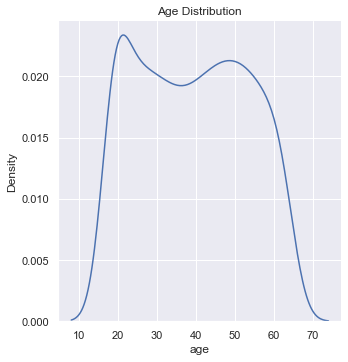

In [14]:
sns.set()
plt.figure(figsize=(10,8))
sns.displot(x=insurance['age'],kind='kde')
plt.title('Age Distribution')
plt.show()

##### The univatiate analysis of the age distribution for our dataset reveals a clear peak at the age of approx. 22, which means that people around 22 years old is the most common age among individual in our dataset. The second  most common age appears to be approximately or close to 49

<Figure size 720x576 with 0 Axes>

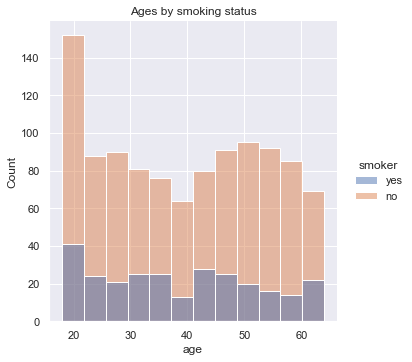

In [15]:
sns.set()
plt.figure(figsize=(10,8))
sns.displot(x=insurance['age'],hue=insurance['smoker'])
plt.title('Ages by smoking status')
plt.show()

##### The univariant analysis of the age distribution by their smoking status shows that many younger adults in their twenties are smokers.

In [16]:
#value count of male and female

insurance['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

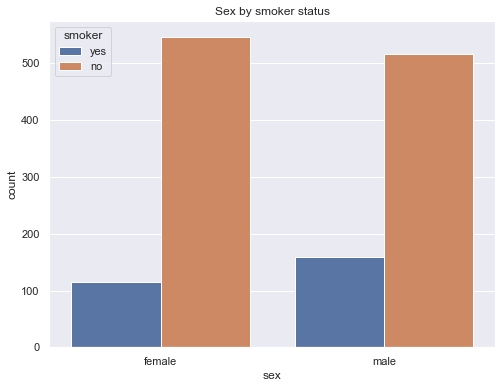

In [17]:
sns.set()
plt.figure(figsize=(8,6))
sns.countplot(x=insurance['sex'],hue=insurance['smoker'])
plt.title('Sex by smoker status')
plt.show()

##### This univariate analysis of the sex column indicates that we have a slight change in the numbers of female to male in our dataset but there are more male smokers to female smokers. i.e. the likelihood of a female being a smoker is lesser when compared to the male gender.

<Figure size 576x432 with 0 Axes>

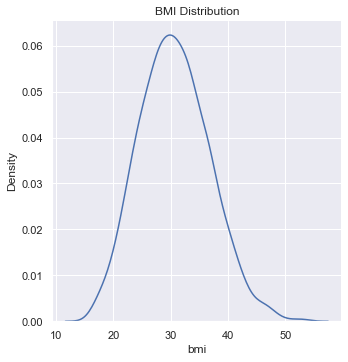

In [18]:
sns.set()
plt.figure(figsize=(8,6))
sns.displot(x=insurance['bmi'],kind='kde')
plt.title('BMI Distribution')
plt.show()

##### From the plot above, we can draw an inference that the BMI of individual in the dataset is normally distributed i.e the mean, median and mode are all centered. Also the most BMI in the dataset is around 30. This shows that most people are slightly overweighted and so close to being Obese.

<Figure size 576x432 with 0 Axes>

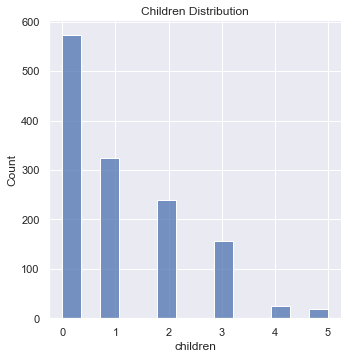

In [19]:
sns.set()
plt.figure(figsize=(8,6))
sns.displot(x=insurance['children'])
plt.title('Children Distribution')
plt.show()

##### This univariant analysis shows that people with no children are much when compared to those with children and as such the plot is right-skewed

In [20]:
#Value count of  smmokers and non-smokers

insurance['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<Figure size 576x432 with 0 Axes>

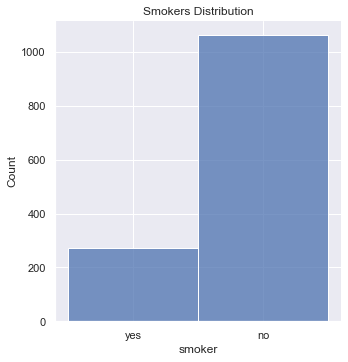

In [21]:
sns.set()
plt.figure(figsize=(8,6))
sns.displot(x=insurance['smoker'])
plt.title('Smokers Distribution')
plt.show()

##### The inference drawn from the plot above shows that we have very few smokers compared to non-smokers which is a good thing for the health of an individual

In [22]:
smokers=insurance[insurance['smoker']=='yes']

In [23]:
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [24]:
smokers['children'].value_counts()

0    115
1     61
2     55
3     39
4      3
5      1
Name: children, dtype: int64

In [25]:
smokers['region'].value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

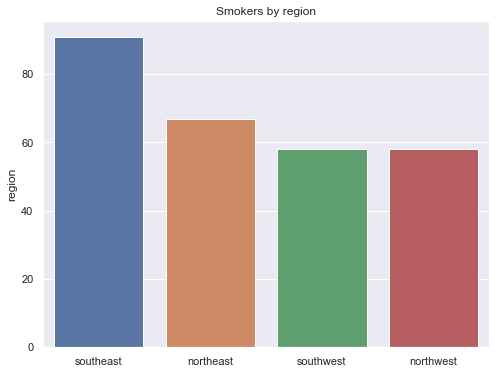

In [26]:
sns.set()
plt.figure(figsize=(8,6))
sns.barplot(smokers['region'].value_counts().keys(),smokers['region'].value_counts())
plt.title('Smokers by region')
plt.show()

##### From our plot, there are more number of people in the 'Southeast than any other region

#### So far, it is evident enough that we have both numerical and categorical columns. The categorical columns will not be accepted into the model if not converted to numbers. Thus, we can achieve that by encoding each categorical column.

#### The sex, region and smoker can be encoded

In [27]:
#Label encoding of the sex column
insurance['sex'].replace({"female":1,"male":0},inplace=True)

#label encoding of the smokers column
insurance['smoker'].replace({"yes":1,"no":0},inplace=True)

#label encoding of the region column
insurance['region'].replace({"southeast":0,"southwest":1,"northeast":2,"northwest":3},inplace=True)

In [28]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Text(0.5, 1.0, 'Correlation Matrix')

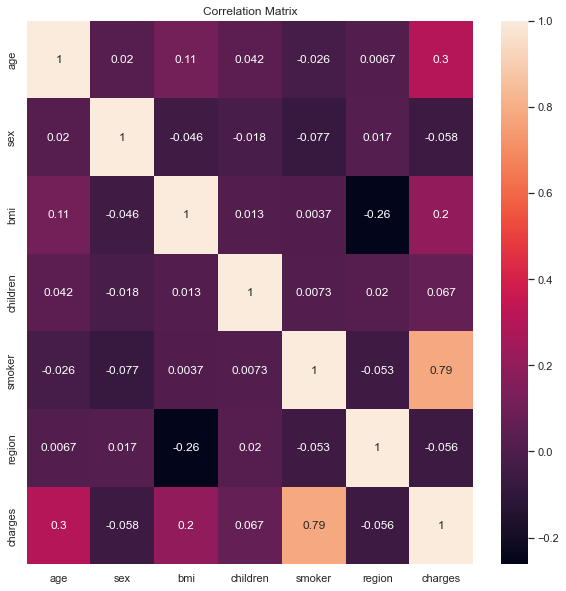

In [29]:
#Display the correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(insurance.corr(),annot=True)
plt.title('Correlation Matrix')

##### Inference from the correlation analysis shows that the children included in the scheme and smokers status of an inidividual are positively correlated with the charges incurred for medical insuance. Do note that the correlation be it positive or negative doesn't signify causation but can show us which features could impact on our model

# 🔧Feature Engineering

In [31]:
#Split the dataset into features and target

X=insurance.iloc[:,0:-1]

In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1337 rows x 6 columns]


In [33]:
print(X.shape)

(1337, 6)


In [34]:
y=insurance.iloc[:,-1]

In [35]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [36]:
print(y.shape)

(1337,)


## Split the dataset into training and test data

In [37]:
#import the train_test_split function

from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [40]:
print(y.shape,y_train.shape,y_test.shape)

(1337,) (1069,) (268,)


# 🤖Machine Learning

## 🏋️‍Building our model

In [41]:
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [42]:
models=[LinearRegression(),HuberRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]

In [43]:
#list to hold r2 scores of different r2_scores

r2_scores=[]

In [44]:
from sklearn.metrics import r2_score

## Ensembling method

In [45]:
def comparing_models():
    for model in models:
        model.fit(X_train,y_train)
        prediction = model.predict(X_test)
        r_square=round(r2_score(y_test,prediction),3)
        r2_scores.append(r_square)
        print(f"The R-square value of {model}  is {r_square}")

In [46]:
#Run the function

comparing_models()

The R-square value of LinearRegression()  is 0.751
The R-square value of HuberRegressor()  is 0.738
The R-square value of DecisionTreeRegressor()  is 0.628
The R-square value of RandomForestRegressor()  is 0.823
The R-square value of KNeighborsRegressor()  is 0.097


In [47]:
r2_scores

[0.751, 0.738, 0.628, 0.823, 0.097]

## 📈Visualization of the metrics

In [48]:
model_data={'model':['LR','HR','DTR','RF','KNN'],
           'r_square':r2_scores
           }

In [49]:
pd.DataFrame(model_data)

,model,r_square
0,LR,0.751
1,HR,0.738
2,DTR,0.628
3,RF,0.823
4,KNN,0.097


Text(0.5, 1.0, 'R-Square Metrics')

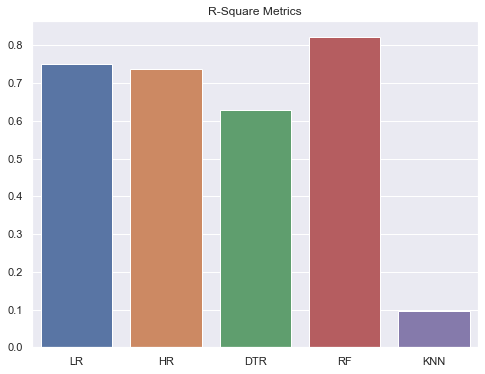

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x=model_data['model'],y=model_data['r_square'])
plt.title('R-Square Metrics')

##### Visualiztion of the metrics shows that the Random Forest Model has a high R-square value and hence can be used to build a predictive model. Before we conclude on this, let's check the r-square of the training dataset and compare with that of the test data set 

In [51]:
rf=RandomForestRegressor()

In [52]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
#Predict the train dataset

train_data_prediction=rf.predict(X_train)

In [54]:
#check the r-square value of the train dataset

r2_train_data=round(r2_score(y_train,train_data_prediction),3)

In [55]:
r2_train_data

0.977

In [56]:
difference=r2_train_data - r2_scores[3]

print(format(difference,'.3f'))

0.154


##### The difference between the r-square is quite small and hence can conclude that there is no overfitting. We can go ahead and make use of the model.

In [57]:
#Hypertune the regressor to iterate over 1000 in search of a better prediction and to maintain a particular state when iterating

regressor=RandomForestRegressor(random_state=2,n_estimators=1000)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=2)

## Building a predictive system

In [58]:
input_data=[27,0,42.13,0,1,0]

input_data_to_array=np.asarray(input_data)

input_data_reshaped=input_data_to_array.reshape(1,-1)

In [59]:
prediction=regressor.predict(input_data_reshaped)

In [60]:
print("The insurance cost is $",format(prediction[0],'.2f'),sep='')

The insurance cost is $39891.86


## ✔Saving the model

In [61]:
import joblib

joblib.dump(regressor,'regressor.joblib')

print("Model has been saved")

Model has been saved


In [62]:
model=joblib.load('regressor.joblib')

input_data_to_array=np.asarray([27,0,42.13,0,1,0])

input_data_reshaped=input_data_to_array.reshape(1,-1)
model.predict(input_data_reshaped)

array([39891.85651964])